# Importing  the Dataset and required Libraries


In [ ]:
pip install ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.manifold import TSNE

In [ ]:
#Fetching the dataset
student_performance = fetch_ucirepo(id=320)

X = student_performance.data.features
y = student_performance.data.targets

X['G1'] = y['G1']
X['G2'] = y['G2']

y = y.drop(columns=['G1', 'G2'])


<ipython-input-83-cf10e6e13f33>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['G1'] = y['G1']
<ipython-input-83-cf10e6e13f33>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['G2'] = y['G2']


# Conversion,Scaling and Splitting of the Dataset

In [ ]:
# Convert X to a Pandas DataFrame if it's a NumPy array
if isinstance(X, np.ndarray):
    X = pd.DataFrame(X)  # Convert to DataFrame

label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Now X contains numerical values and y has been label encoded where applicable
print(X.head())
print(y.head())

   school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        0        0     4     4     0     4  ...   
1       0    0   17        1        0        1     1     1     0     2  ...   
2       0    0   15        1        1        1     1     1     0     2  ...   
3       0    0   15        1        0        1     4     2     1     3  ...   
4       0    0   16        1        0        1     3     3     2     2  ...   

   romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  
0         0       4         3      4     1     1       3         4   0  11  
1         0       5         3      3     1     1       3         2   9  11  
2         0       4         3      2     2     3       3         6  12  13  
3         1       3         2      2     1     1       5         0  14  14  
4         0       4         3      2     1     2       5         0  11  13  

[5 rows x 32 columns]
   G3
0  11
1  11
2  12
3  14
4  13


<ipython-input-84-9fbe6ba072c8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoders[column].fit_transform(X[column])
<ipython-input-84-9fbe6ba072c8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoders[column].fit_transform(X[column])
<ipython-input-84-9fbe6ba072c8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [ ]:
#standardization
scaler = StandardScaler()
X = scaler.fit_transform(X)

print(X)

[[-0.73094388 -0.83337685  1.03169516 ...  0.07343336 -4.15547029
  -0.19581961]
 [-0.73094388 -0.83337685  0.21013668 ... -0.35786305 -0.87456978
  -0.19581961]
 [-0.73094388 -0.83337685 -1.43298028 ...  0.50472977  0.21906372
   0.49113675]
 ...
 [ 1.36809408 -0.83337685  1.03169516 ...  0.50472977 -0.14548078
   0.14765857]
 [ 1.36809408  1.19993734  0.21013668 ...  0.50472977 -0.51002528
  -0.53929779]
 [ 1.36809408  1.19993734  1.03169516 ...  0.07343336 -0.51002528
  -0.19581961]]


In [ ]:
#train test split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25, random_state=42)

# LINEAR REGRESSION

In [ ]:
#regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)

r2score = regressor.score(X_test, y_test)
print(r2score)

0.868004395698927


# SUPPORT VECTOR MACHINES

In [ ]:
#SVM rbf
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)

r2score = regressor.score(X_test, y_test)
print(r2score)

#SVM Linear
regressor=SVR(kernel="linear")
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)

r2score = regressor.score(X_test, y_test)
print(r2score)

#SVM Polynomial
regressor=SVR(kernel="poly")
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)

r2score = regressor.score(X_test, y_test)
print(r2score)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7327927497050053
0.8816447179453605
0.7117168559965095


## Support Vector Machines with Hyperparameter Tuning



### SVM with RBF Kernel in Grid Search

In [ ]:
hpt_svm_reg = SVR(kernel = "rbf")
hpt_svm_reg.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
# We take the parameters to tune as 'C' and 'gamma'
hpt_param_grid = [{'C':[i for i in range(1,10)],
                   'gamma' : np.linspace(0,0.1)}]
hpt_param_grid

[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
  'gamma': array([0.        , 0.00204082, 0.00408163, 0.00612245, 0.00816327,
         0.01020408, 0.0122449 , 0.01428571, 0.01632653, 0.01836735,
         0.02040816, 0.02244898, 0.0244898 , 0.02653061, 0.02857143,
         0.03061224, 0.03265306, 0.03469388, 0.03673469, 0.03877551,
         0.04081633, 0.04285714, 0.04489796, 0.04693878, 0.04897959,
         0.05102041, 0.05306122, 0.05510204, 0.05714286, 0.05918367,
         0.06122449, 0.06326531, 0.06530612, 0.06734694, 0.06938776,
         0.07142857, 0.07346939, 0.0755102 , 0.07755102, 0.07959184,
         0.08163265, 0.08367347, 0.08571429, 0.0877551 , 0.08979592,
         0.09183673, 0.09387755, 0.09591837, 0.09795918, 0.1       ])}]

In [ ]:
grid_search = GridSearchCV(estimator = hpt_svm_reg,
                          param_grid = hpt_param_grid,
                          cv = 5)

In [ ]:
grid_search.fit(X_train,y_train)

In [ ]:
print(grid_search.best_params_)

{'C': 9, 'gamma': 0.004081632653061225}


In [ ]:
score_rbf_grid=print(grid_search.best_score_)
score_rbf_grid

0.8181756549995545


In [ ]:
svm_rbf = SVR(kernel='rbf',C=9, gamma=0.01)

svm_rbf.fit(X_train, y_train)
score_svm_rbf = svm_rbf.score(X_test, y_test)

print(score_svm_rbf)

0.8625218090577952


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### SVM with RBF Kernel in Random Search

In [ ]:
hpt_param_dict = {'C' : [i for i in range(0,100)],
                 'gamma' : np.linspace(0,0.1)}


In [ ]:
random_search = RandomizedSearchCV(estimator = hpt_svm_reg,
                                  param_distributions = hpt_param_dict,
                                  cv = 5)

In [ ]:
random_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

RandomizedSearchCV(cv=5, estimator=SVR(),
                   param_distributions={'C': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                              11, 12, 13, 14, 15, 16, 17, 18,
                                              19, 20, 21, 22, 23, 24, 25, 26,
                                              27, 28, 29, ...],
                                        'gamma': array([0.        , 0.00204082, 0.00408163, 0.00612245, 0.00816327,
       0.01020408, 0.0122449 , 0.01428571, 0.01632653, 0.01836735,
       0.02040816, 0.02244898, 0.0244898 , 0.02653061, 0.02857143,
       0.03061224, 0.03265306, 0.03469388, 0.03673469, 0.03877551,
       0.04081633, 0.04285714, 0.04489796, 0.04693878, 0.04897959,
       0.05102041, 0.05306122, 0.05510204, 0.05714286, 0.05918367,
       0.06122449, 0.06326531, 0.06530612, 0.06734694, 0.06938776,
       0.07142857, 0.07346939, 0.0755102 , 0.07755102, 0.07959184,
       0.08163265, 0.08367347, 0.08571429, 0.0877551 , 0.08979592,
       0.09183673, 0.09387755, 0.09591837, 0.09795918, 0.1       ])})

In [ ]:
random_search.best_params_

{'gamma': 0.006122448979591837, 'C': 20}

In [ ]:
random_search.best_score_

0.817879708985016

In [ ]:
svm_rbf_rnd = SVR(kernel='rbf',C=95, gamma=0.004)

svm_rbf_rnd.fit(X_train, y_train)
score_svm_rbf_rnd = svm_rbf_rnd.score(X_test, y_test)

print(score_svm_rbf_rnd)

0.8573136013714271


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# DECISION TREES

In [ ]:
#decision tree

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)

r2score = regressor.score(X_test, y_test)
print(r2score)

0.7066593984288658


## Decision trees with Hyperparameter Tuning

### Decision Trees with Grid Search

In [ ]:
hpt_decision_tree = DecisionTreeRegressor(random_state=42)
hpt_decision_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
# We take the hyperparameter to tune as max_depth
hpt_param_dict1 = [{'max_depth' : [i for i in range(0,10)]}]
hpt_param_dict1

[{'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}]

In [ ]:
decision_tree = GridSearchCV(estimator = hpt_decision_tree,
                   param_grid = hpt_param_dict1,
                   cv=5)

In [ ]:
decision_tree.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid=[{'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}])

In [ ]:
decision_tree.best_params_

{'max_depth': 4}

In [ ]:
decision_tree.best_score_

0.8023504666603423

In [ ]:
decision_tree.best_estimator_

DecisionTreeRegressor(max_depth=4, random_state=42)

In [ ]:
dt = DecisionTreeRegressor(max_depth=5,random_state=42)
dt.fit(X_train,y_train)
score_dt = dt.score(X_test,y_test)
print(score_dt)

0.7707726926912735


### Decision Trees with Random Search

In [ ]:
hpt_param_dist = {'max_depth':[i for i in range(0,10)]}
hpt_param_dist

{'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}

In [ ]:
ran_for = RandomizedSearchCV(estimator = hpt_decision_tree,
                        param_distributions=hpt_param_dist,
                        cv = 5)

In [ ]:
ran_for.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   param_distributions={'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                      9]})

In [ ]:
ran_for.best_params_

{'max_depth': 4}

In [ ]:
ran_for.best_score_

0.8023504666603423

In [ ]:
dt_rand = DecisionTreeRegressor(max_depth=4,random_state=42)
dt_rand.fit(X_train,y_train)

score_dt_rand = dt_rand.score(X_test,y_test)
print(score_dt_rand)

0.79525681412459


# RANDOM FOREST

In [ ]:
#random forest

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)

r2score = regressor.score(X_test, y_test)
print(r2score)

<ipython-input-14-3c50850036c4>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


0.8573946574718481


## Random Forest with Hyperparameter Tuning

### Random Forest with Grid Search

In [ ]:
hpt_random_forest = RandomForestRegressor(random_state=42)
hpt_random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# We take the hyperparameters to tune as 'n_estimators' and 'max_depth'
hpt_gridsrch= hpt_param_grid = [
    {'n_estimators':[i for i in range(10,101,10)],
     'max_depth': [j for j in range(0,10)]}]
hpt_gridsrch

[{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
  'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}]

In [ ]:
grid_search = GridSearchCV(estimator = hpt_random_forest,
                          param_grid = hpt_gridsrch,
                          cv = 5)

In [ ]:
grid_search.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                           100]}])

In [ ]:
grid_search.best_params_

{'max_depth': 5, 'n_estimators': 30}

In [ ]:
grid_search.best_score_

0.8435045302885419

In [ ]:
rand_for = RandomForestRegressor(max_depth = 6, n_estimators = 100,random_state = 42)
rand_for.fit(X_train,y_train)
score_rand_for = rand_for.score(X_test,y_test)
print(score_rand_for)

<ipython-input-42-ff3aa9ad7f36>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_for.fit(X_train,y_train)


0.8573461911006742


### Random Forest with Random Search

In [ ]:
hpt_param_dist = {'max_depth' : [j for j in range(0,10)],
                 'n_estimators' : [i for i in range(10,101,10)]}
hpt_param_dist

{'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

In [ ]:
random_forest_rd = RandomizedSearchCV(estimator = hpt_random_forest,
                                   param_distributions = hpt_param_dist,
                                    cv=5)

In [ ]:
random_forest_rd.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]})

In [ ]:
random_forest_rd.best_params_

{'n_estimators': 30, 'max_depth': 5}

In [ ]:
random_forest_rd.best_score_

0.8435045302885419

In [ ]:
rand_for_rd = RandomForestRegressor(max_depth = 8,n_estimators =40,random_state=42)
rand_for_rd.fit(X_train,y_train)

score_rand_for_rd = rand_for_rd.score(X_test,y_test)
print(score_rand_for_rd)

0.8535190581653576


<ipython-input-48-4d4771dff1fe>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_for_rd.fit(X_train,y_train)


# ADABOOST

In [ ]:
#adaboost

regressor = AdaBoostRegressor()
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)

r2score = regressor.score(X_test, y_test)
print(r2score)

0.8204819703244721


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## AdaBoost with Hyperparameter Tuning

### AdaBoost with Grid Search

In [ ]:
hpt_adaboost = AdaBoostRegressor(random_state=42)
hpt_adaboost.get_params()

{'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': 42}

In [ ]:
# We take the hyperparameters to tune as 'learning_rate' and 'n_estimators'
hpt_gridsrch = [{'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                'n_estimators': [j for j in range(10,101,10)]}]
hpt_gridsrch

[{'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
  'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}]

In [ ]:
ada_boost = GridSearchCV(estimator = hpt_adaboost,
                        param_grid = hpt_gridsrch,
                        cv=5)

In [ ]:
ada_boost.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=42),
             param_grid=[{'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                            0.8, 0.9],
                          'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                           100]}])

In [ ]:
ada_boost.best_params_

{'learning_rate': 0.2, 'n_estimators': 10}

In [ ]:
ada_boost.best_score_

0.8388622059549998

In [ ]:
ada_boost_ = AdaBoostRegressor(learning_rate = 0.8,n_estimators=20)
ada_boost_.fit(X_train,y_train)

score_ada_boost_ = ada_boost_.score(X_test,y_test)
print(score_ada_boost_)

0.7961819603323573


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### AdaBoost with Random Search

In [ ]:
hpt_param_dist = {'learning_rate' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                 'n_estimators': [j for j in range(10,101,10)]}
hpt_param_dist

{'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

In [ ]:
ada_boost_rndsrch = RandomizedSearchCV(estimator = hpt_adaboost,
                                      param_distributions = hpt_param_dist,
                                      cv=5)

In [ ]:
ada_boost_rndsrch.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=42),
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6, 0.7, 0.8,
                                                          0.9],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]})

In [ ]:
ada_boost_rndsrch.best_params_

{'n_estimators': 20, 'learning_rate': 0.1}

In [ ]:
ada_boost_rndsrch.best_score_

0.8302006991558176

In [ ]:
ada_boost_rnd = AdaBoostRegressor(n_estimators = 80,learning_rate=0.5)
ada_boost_rnd.fit(X_train,y_train)

score_ada_boost_rnd = ada_boost_rnd.score(X_test,y_test)
print(score_ada_boost_rnd)

0.8148418696580582


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# GRADIENT BOOSTING

In [ ]:
#gradient boost

regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)

r2score = regressor.score(X_test, y_test)
print(r2score)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.849332123027631


## Gradient Boosting with Hyperparameter Tuning

### Gradient Boosting with Grid Search

In [ ]:
hpt_gradient_boost = GradientBoostingRegressor(random_state=42)
hpt_gradient_boost.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# We take the hyperparameters to tune as 'max_depth' and 'n_estimators'
hpt_gridsrch = [{'max_depth' : [i for i in range(1,10)],
                'n_estimators' : [j for j in range(1,100,10)]}]
hpt_gridsrch

[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
  'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91]}]

In [ ]:
gridsrch = GridSearchCV(estimator = hpt_gradient_boost,
                       param_grid = hpt_gridsrch,
                       cv =5)

In [ ]:
gridsrch.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81,
                                           91]}])

In [ ]:
gridsrch.best_params_

{'max_depth': 2, 'n_estimators': 31}

In [ ]:
gridsrch.best_score_

0.8387385117210352

In [ ]:
grd_boost = GradientBoostingRegressor(max_depth = 4, n_estimators = 81)
grd_boost.fit(X_train,y_train)

score_grd_boost = grd_boost.score(X_test,y_test)
print(score_grd_boost)

0.8543530871847931


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Gradient Boosting with Random Search

In [ ]:
hpt_randsrch = {'max_depth' : [i for i in range(1,10)],
               'n_estimators': [j for j in range(1,100,10)]}
hpt_randsrch

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91]}

In [ ]:
rand_srch = RandomizedSearchCV(estimator = hpt_gradient_boost,
                              param_distributions =hpt_randsrch,
                              cv =5)

In [ ]:
rand_srch.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'n_estimators': [1, 11, 21, 31, 41, 51,
                                                         61, 71, 81, 91]})

In [ ]:
rand_srch.best_params_

{'n_estimators': 31, 'max_depth': 5}

In [ ]:
rand_srch.best_score_

0.8313032702142553

In [ ]:
grd_boost_rnd = GradientBoostingRegressor(n_estimators = 57,max_depth = 3)
grd_boost_rnd.fit(X_train,y_train)

score_grd_boost_rnd = grd_boost_rnd.score(X_test,y_test)
print(score_grd_boost_rnd)

0.8541981417025531


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# RESULTS

### Before Hyperparameter Tuning

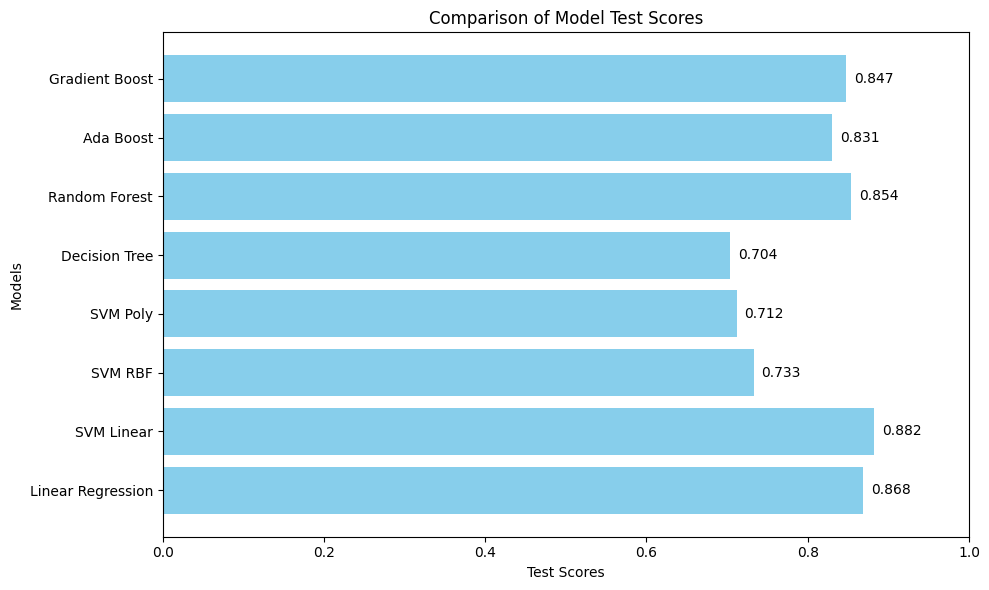

In [ ]:
#Results without Hyperparameter Tuning
models = ['Linear Regression', 'SVM Linear', 'SVM RBF', 'SVM Poly', 'Decision Tree', 'Random Forest', 'Ada Boost', 'Gradient Boost']
scores = [0.868004395698927, 0.8816447179453605, 0.7327927497050053, 0.7117168559965095,0.7036164461304102,
          0.8537378808357479, 0.8306608865194576, 0.8471263659486388]

plt.figure(figsize=(10, 6))
bars = plt.barh(models, scores, color='skyblue')

for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 0.01, bar.get_y() + bar.get_height()/2, round(xval, 3), ha='left', va='center')

plt.xlabel('Test Scores')
plt.ylabel('Models')
plt.title('Comparison of Model Test Scores')
plt.xlim(0, 1)

plt.tight_layout()
plt.show()

### After Hyperparameter Tuning

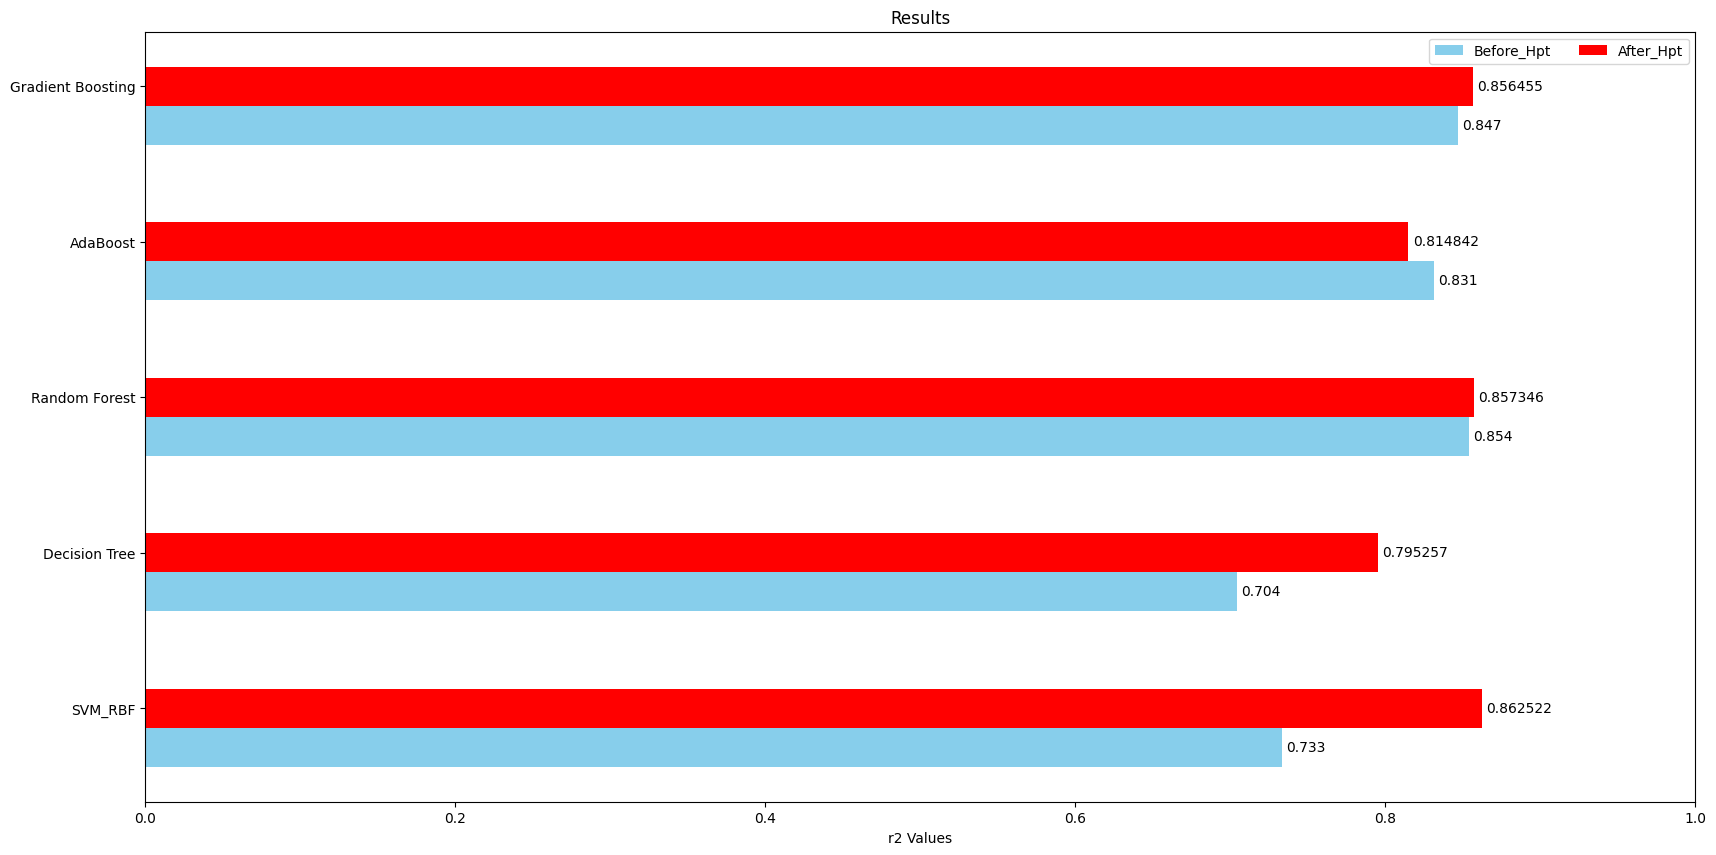

In [ ]:
#Results after Hyperparameter Tuning
methods = ('SVM_RBF', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting')
d_results_plot = {
    'Before_Hpt': [0.733, 0.704, 0.854, 0.831, 0.847],
    'After_Hpt': [score_svm_rbf, score_dt_rand, score_rand_for, score_ada_boost_rnd, score_grd_boost_rnd]
}
Y = np.arange(len(methods))
height = 0.25
multiplier = 0

fig, ax = plt.subplots(figsize=(20, 10), layout=None)

for attribute, measurement in d_results_plot.items():
    offset = height * multiplier
    if attribute == 'Before_Hpt':
        rects = ax.barh(Y + offset, measurement, height, label=attribute, color='skyblue')
    else:
        rects = ax.barh(Y + offset, measurement, height, label=attribute, color='red')
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_xlabel('r2 Values')
ax.set_title('Results')
ax.set_yticks(Y + height, methods)
ax.legend(loc='upper right', ncols=2)
ax.set_xlim(0, 1)
plt.savefig("output1.jpg")
plt.show()


In [ ]:
#Tabular column representing the scores of each model before hyperparametertuning and after hyperparametertuning
before_abd_after_hypert= {
    'Algorithms':['SVM_RBF','Decision Tree','Random Forest','AdaBoost','Gradient Boosting'],
    'Before_Hyperpt':[0.733, 0.704, 0.854, 0.831, 0.847],
    'After_Hyperpt':[score_svm_rbf, score_dt_rand, score_rand_for, score_ada_boost_rnd, score_grd_boost_rnd]
}
df = pd.DataFrame(data=before_abd_after_hypert)
df.set_index('Algorithms', inplace=True)
df.round(3)

,Before_Hyperpt,After_Hyperpt
Algorithms,,
SVM_RBF,0.733,0.863
Decision Tree,0.704,0.795
Random Forest,0.854,0.857
AdaBoost,0.831,0.815
Gradient Boosting,0.847,0.856


# Feature Reduction

In [ ]:
pca = PCA(n_components=16)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(X_train_pca.shape)
print(X_test_pca.shape)

(486, 16)
(163, 16)


In [ ]:
grid_search = GridSearchCV(estimator = hpt_svm_reg,
                          param_grid = hpt_param_grid,
                          cv = 5)

In [ ]:
grid_search.fit(X_train_pca,y_train)

In [ ]:
new_score = grid_search.score(X_test_pca,y_test)
print(new_score)

0.7863242828442119


# Feature Selection

In [ ]:
fs = SelectPercentile(score_func=f_regression,percentile=50)
X_train_fs = fs.fit_transform(X_train,y_train)
X_test_fs = fs.transform(X_test)

print(X_train_fs.shape)
print(X_test_fs.shape)

(486, 16)
(163, 16)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
fs.get_feature_names_out()

array(['x0', 'x2', 'x3', 'x6', 'x7', 'x8', 'x10', 'x12', 'x13', 'x14',
       'x20', 'x21', 'x26', 'x27', 'x30', 'x31'], dtype=object)

In [ ]:
grid_search = GridSearchCV(estimator = hpt_svm_reg,
                          param_grid = hpt_param_grid,
                          cv = 5)
grid_search.fit(X_train_fs,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'gamma': array([0.        , 0.00204082, 0.00408163, 0.00612245, 0.00816327,
       0.01020408, 0.0122449 , 0.01428571, 0.01632653, 0.01836735,
       0.02040816, 0.02244898, 0.0244898 , 0.02653061, 0.02857143,
       0.03061224, 0.03265306, 0.03469388, 0.03673469, 0.03877551,
       0.04081633, 0.04285714, 0.04489796, 0.04693878, 0.04897959,
       0.05102041, 0.05306122, 0.05510204, 0.05714286, 0.05918367,
       0.06122449, 0.06326531, 0.06530612, 0.06734694, 0.06938776,
       0.07142857, 0.07346939, 0.0755102 , 0.07755102, 0.07959184,
       0.08163265, 0.08367347, 0.08571429, 0.0877551 , 0.08979592,
       0.09183673, 0.09387755, 0.09591837, 0.09795918, 0.1       ])}])

In [ ]:
score_fs = grid_search.score(X_test_fs,y_test)
print(score_fs)

0.8768691964834187


# tSNE

In [ ]:
tsne_1 = TSNE(n_components=2, init='pca', learning_rate='auto')
X_train_tsne = tsne_1.fit_transform(X_train)
print(X_train_tsne.shape)

(486, 2)


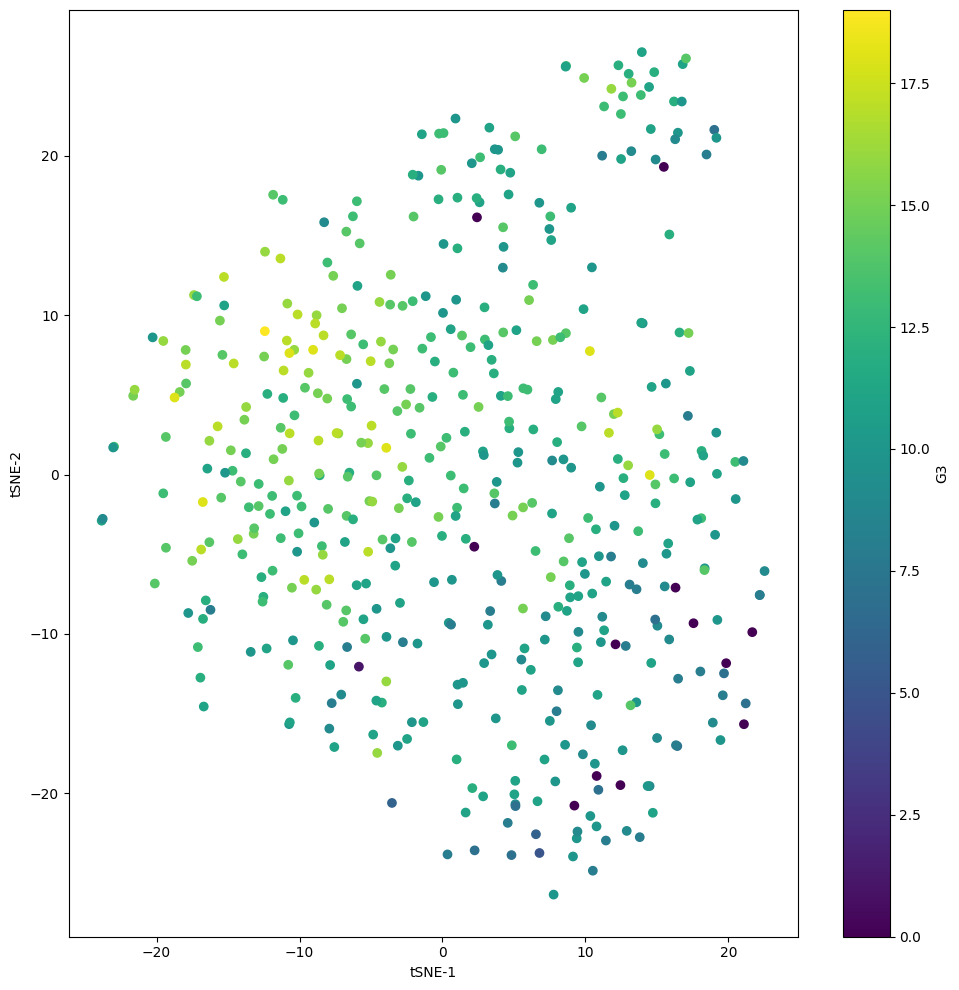

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
y_train = np.array(y_train)
scatter = ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis', marker='o')

ax.set_xlabel("tSNE-1")
ax.set_ylabel("tSNE-2")

colorbar = plt.colorbar(scatter, ax=ax)
colorbar.set_label('G3')

plt.tight_layout()
plt.show()
